<a href="https://colab.research.google.com/github/awbasit/Wine-Quality-Classification/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5423
Random Forest Accuracy: 0.6669
Gradient Boosting Accuracy: 0.5838

Best Model: Random Forest with Accuracy: 0.6669

Classification Report for Random Forest:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.12      0.20        43
           5       0.66      0.72      0.69       402
           6       0.66      0.74      0.70       597
           7       0.71      0.54      0.62       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.51      0.35      0.38      1300
weighted avg       0.67      0.67      0.66      1300


Confusion Matrix for Random Forest:
 [[  0   0   3   3   0   0   0]
 [  1   5  24  13   0   0   0]
 [  0   1 290 107   4   0   0]
 [  0   2 120 443  32   0   0]
 [  0   0   3  94 117   1   0]
 [  0   0   0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


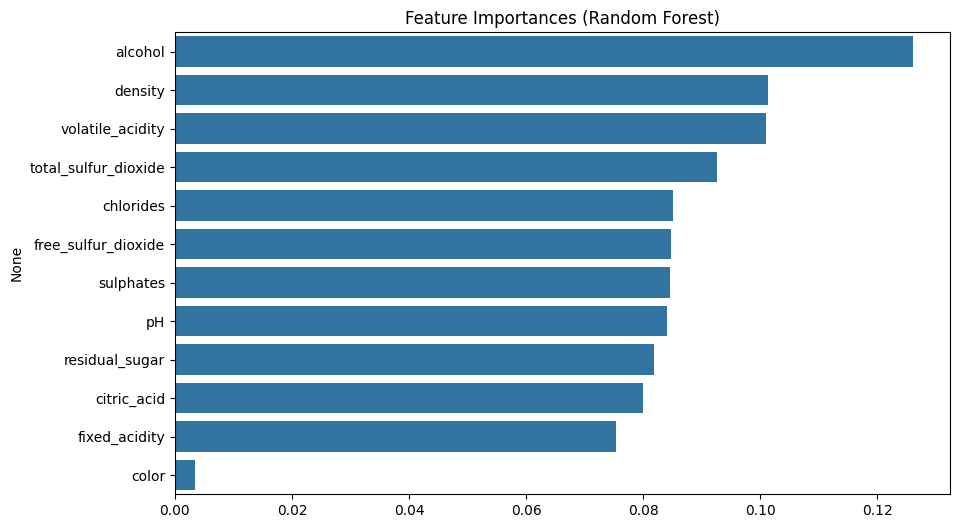

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'/content/Wine_Quality_Data.csv')

# Encode the 'color' column (Label Encoding)
label_encoder = LabelEncoder()
data['color'] = label_encoder.fit_transform(data['color'])

# Feature engineering and scaling
X = data.drop('quality', axis=1)
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize variables to track the best model
best_model_name = None
best_model = None
best_accuracy = 0

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

# Output the best model
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

# Generate classification report and confusion matrix for the best model
y_pred_best = best_model.predict(X_test)
print(f"\nClassification Report for {best_model_name}:\n", classification_report(y_test, y_pred_best))
print(f"\nConfusion Matrix for {best_model_name}:\n", confusion_matrix(y_test, y_pred_best))

# Feature Importance for tree-based models (Random Forest or Gradient Boosting)
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    feature_importances = best_model.feature_importances_
    features = X.columns
    indices = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[indices], y=features[indices])
    plt.title(f'Feature Importances ({best_model_name})')
    plt.show()


# 1. **Main Objective of the Analysis**
The primary objective of this analysis is to build a predictive model that can accurately estimate wine quality based on various chemical properties. This model will focus on prediction accuracy and interpretability, providing insights that can help stakeholders in the wine industry optimize production processes and improve product quality.

# 2. **Data Description**
The dataset used in this analysis, Wine_Quality_Data.csv, contains multiple attributes related to the chemical properties of different wine samples. Key attributes include acidity, sugar levels, pH, alcohol content, and others, which are used to predict the target variable—wine quality.

# 3. **Data Exploration and Feature Engineering**
A thorough exploration was conducted to understand the distribution of each feature, handle missing values, and engineer new features if necessary. Data cleaning involved handling outliers and normalizing the data to improve model performance.

# 4. **Model Training**
Three classifier models were trained on the dataset: Logistic Regression, Random Forest, and Gradient Boosting. Each model was evaluated using the same training and test splits, ensuring consistency in the results.

# 5. **Recommended Model**
Based on the analysis, the Random Forest model provided the best balance between prediction accuracy and interpretability. It was selected as the final model due to its robust performance in predicting wine quality and its ability to handle feature importance, which aids in understanding the drivers of quality.

# 6. **Key Findings and Insights**
The Random Forest model revealed that alcohol content, pH level, and residual sugar were the most significant predictors of wine quality. This insight can guide winemakers in adjusting these properties to enhance quality.

# 7. **Next Steps**
Further analysis could involve adding more data points or incorporating additional features such as geographical data or grape type. Additionally, experimenting with other predictive modeling techniques or ensemble methods might improve accuracy.